In [1]:
!pip install tensorflow pillow matplotlib scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Create dataset folder
os.makedirs('dataset/images', exist_ok=True)

# Characters list A-Z and a-z
characters_list = [chr(i) for i in range(ord('A'), ord('Z')+1)]

print(f"Total characters: {len(characters_list)}")
print("Example characters:", characters_list[:5])

# Function to create character image
def create_character_image(char, font_size=32):
    img = Image.new('L', (50, 50), color=255)  # White background
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except:
        font = ImageFont.load_default()
    w, h = draw.textsize(char, font=font)
    draw.text(((50-w)/2, (50-h)/2), char, fill=0, font=font)  # Centered
    return img

# Save images
image_paths = []
labels = []

for char in characters_list:
    for i in range(200):  # 200 images per character
        img = create_character_image(char, font_size=random.randint(24, 32))
        img_path = f'dataset/images/{char}_{i}.png'
        img.save(img_path)
        image_paths.append(img_path)
        labels.append(char)

print(f"Generated {len(image_paths)} images.")


Total characters: 26
Example characters: ['A', 'B', 'C', 'D', 'E']


C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipyk

Generated 5200 images.


C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipykernel_10656\912559798.py:18: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  w, h = draw.textsize(char, font=font)
C:\Users\Sanjay Mali\AppData\Local\Temp\ipyk

In [3]:
'''import os'''
print(os.getcwd())

C:\Users\Sanjay Mali\python code


In [4]:
# Load images and labels
X = []
y = []

char_to_index = {char: idx for idx, char in enumerate(characters_list)}

for img_path, label in zip(image_paths, labels):
    img = Image.open(img_path).resize((50, 50))
    img_array = np.array(img)
    X.append(img_array)
    y.append(char_to_index[label])

X = np.array(X)
X = X.reshape(-1, 50, 50, 1) / 255.0  # Normalize
y = np.array(y)
y = to_categorical(y, num_classes=len(characters_list))  # One-hot encoding

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (5200, 50, 50, 1)
y shape: (5200, 26)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4160
Testing samples: 1040


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(characters_list), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Sanjay Mali\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,982,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,218 (7.66 MB)

 Trainable params: 2,008,218 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.3053 - loss: 2.5923 - val_accuracy: 1.0000 - val_loss: 0.0538
Epoch 2/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9603 - loss: 0.1434 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9984 - loss: 0.0200 - val_accuracy: 1.0000 - val_loss: 6.0930e-04
Epoch 4/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9988 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 1.8114e-04
Epoch 5/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 1.7883e-04
Epoch 6/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 3.9338e-05
Epoch 7/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9999 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 1.1037e-04
Epoch 8/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9992 - loss: 0.0047 - va

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 2.6092e-06
Test Accuracy: 1.0000


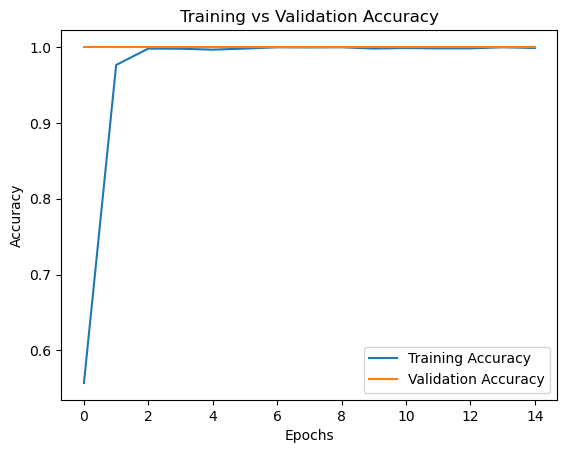

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


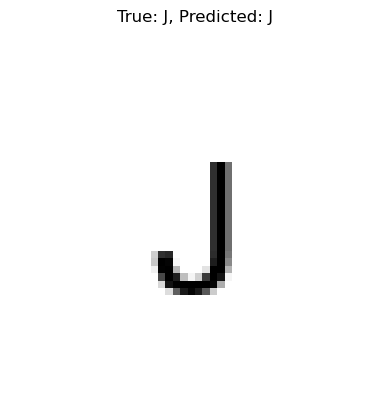

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


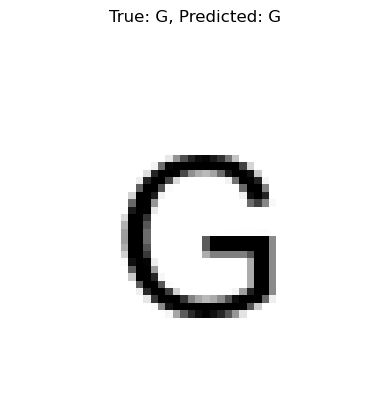

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


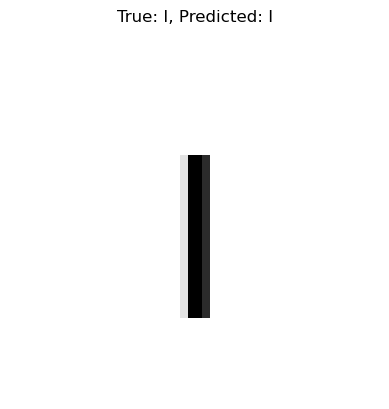

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


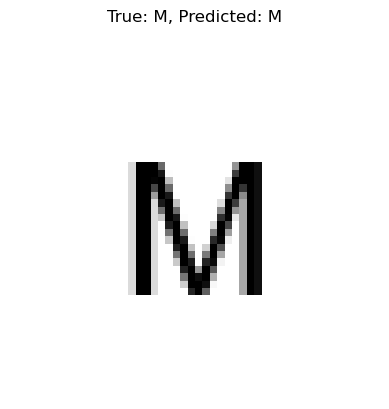

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


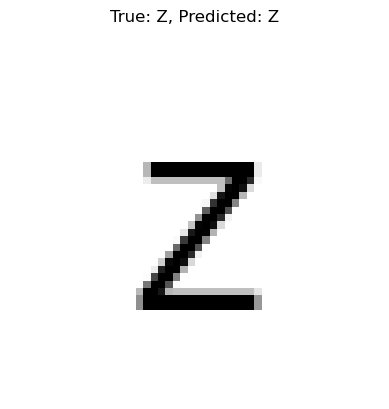

In [11]:
n = 5
sample_indexes = np.random.choice(X_test.shape[0], n)

for idx in sample_indexes:
    img = X_test[idx]
    true_label = np.argmax(y_test[idx])
    pred_label = np.argmax(model.predict(img.reshape(1,50,50,1)))

    plt.imshow(img.reshape(50,50), cmap='gray')
    plt.title(f"True: {characters_list[true_label]}, Predicted: {characters_list[pred_label]}")
    plt.axis('off')
    plt.show()
